# Financial Data Analysis – Data Processing 1: Loan Eligibility Prediction

Machine learning algorithms can help us to estimate the risk of a financial decision.
[Link](https://www.kdnuggets.com/2018/09/financial-data-analysis-loan-eligibility-prediction.html)

This notebook is from kdnuggets (link above) about Loan Eligibility (Darlehen Eignung) Prediction using use Lending club loan data dataset. Lending Club is the world’s largest online marketplace connecting borrowers and investors. An inevitable outcome of lending is default by borrowers. The idea of this tutorial is to create a predictive model that **identifies applicants who are relatively risky for a loan.**

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings 
warnings.filterwarnings("ignore")

Data: 3 years of datasets (2014, 2015 and 2017(first-thrid quarter)) and stored in five separate CSV file.

In [2]:
df1 = pd.read_csv('./data/LoanEligibilityPrediction/2017Q1.csv', skiprows=[0])
df2 = pd.read_csv('./data/LoanEligibilityPrediction/2017Q2.csv', skiprows=[0])
df3 = pd.read_csv('./data/LoanEligibilityPrediction/2017Q3.csv', skiprows=[0])
df4 = pd.read_csv('./data/LoanEligibilityPrediction/2014.csv', skiprows=[0])
df5 = pd.read_csv('./data/LoanEligibilityPrediction/2015.csv', skiprows=[0])

In [3]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,104028593,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,104046702,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Since data are stored in seperate files, we have to make sure that we have the same number of features in each file. 

In [4]:
columns=np.dstack((list(df1.columns),list(df2.columns),list(df3.columns),list(df4.columns),list(df5.columns)))
# all the input array dimensions except for the concatenation axis must match exactly
coldf = pd.DataFrame(columns[0])
coldf

,0,1,2,3,4
0,id,id,id,id,id
1,member_id,member_id,member_id,member_id,member_id
2,loan_amnt,loan_amnt,loan_amnt,loan_amnt,loan_amnt
3,funded_amnt,funded_amnt,funded_amnt,funded_amnt,funded_amnt
4,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv
...,...,...,...,...,...
146,settlement_status,settlement_status,settlement_status,settlement_status,settlement_status
147,settlement_date,settlement_date,settlement_date,settlement_date,settlement_date
148,settlement_amount,settlement_amount,settlement_amount,settlement_amount,settlement_amount
149,settlement_percentage,settlement_percentage,settlement_percentage,settlement_percentage,settlement_percentage


In [5]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
df = pd.concat([df1, df2, df3, df4, df5])

In [7]:
df.shape

(981665, 151)

In [8]:
print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

**We will get through every feature and then select the relevant features. Let's start with the target feature “loan_status”**

In [9]:
df.loan_status.value_counts()

Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: loan_status, dtype: int64

In this tutorial, we are interested in two classes:  
1. Fully paid: those who paid the loan with interests and 
2. Charged off: those who could not pay and finally charged off. Therefore, we select the data sets for these two classes:

In [10]:
keep = df['loan_status'].isin(['Fully Paid' , 'Charged Off'])
df = df.loc[keep]

In [11]:
df.shape

(457728, 151)

Looking at the shape, we see that we now have **half of the data point than original data** and the same number of features. Before processing and cleaning manually, let’s do some general data processing steps first:  
1. Remove features associated with >90% missing values
2. Remove constant features
3. Remove duplicate featues
4. Remove duplicate rows

# 1. Remove features associated with >90% missing values: 
- isnull() to find the rows associated with missing values
- sum them up and count for each feature
- sort the features according to the number of missiing values and create a data frame for further analysis 

In [12]:
missing_df = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()

In [13]:
miss_40000 = list(missing_df[missing_df.missing_value >= 400000]['index'])
print(len(miss_40000))

53


53  features  have 400000 missing values an with pandas’ drop method to remove these 53 features.

In [14]:
df.drop(miss_40000, axis = 1 , inplace = True)

# 2. Remove constant features:

At this step, we remove features that have a single unique value. A feature associated with one unique value does not help the model to generalize well since it’s variance is zero. A tree-based model cannot take advantage of these type of features since the model can not split these features. Constant features can lead to errors in some models and obviously provide no information in the training set that can be learned from. To identify features with a single unique value is relatively straightforward:
1. We can define a fucntion or


**It is important to mention here that, in order to avoid overfitting, feature selection should only be applied to the training set.**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

### 1. We can define a fucntion...

In [16]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features
const_features = find_constant_features(df)

In [17]:
const_features

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']

In [18]:
df.drop(const_features, axis = 1, inplace = True)

### 2. using VarianceThreshold

The function requires a value for its threshold parameter. Passing a value of zero for the parameter will filter all the features with zero variance. Execute the following script to create a filter for constant features.

In [19]:
constant_filter = VarianceThreshold(threshold=0)

In [20]:
# constant_filter.fit(df)

# 3. Remove duplicate featues

In [21]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break

    return dups

In [22]:
duplicate_cols = duplicate_columns(df)
print(duplicate_cols)

['loan_amnt']


We see only one feature which seems to be duplicated. I am not going to remove the feature yet rather wait until we do EDA in the next part.

# 4. Remove duplicate rows: 

In [23]:
df.drop_duplicates(inplace= True)
df.shape

(457728, 93)

In [24]:
df.loan_status[0:5]

16    Fully Paid
38    Fully Paid
40    Fully Paid
51    Fully Paid
56    Fully Paid
Name: loan_status, dtype: object

In [25]:
col_name = 'loan_amnt'
# df.loc[df[col_name].notnull(), col_name]
len(df[col_name].notnull())

457728

In [26]:
len(df[col_name])

457728

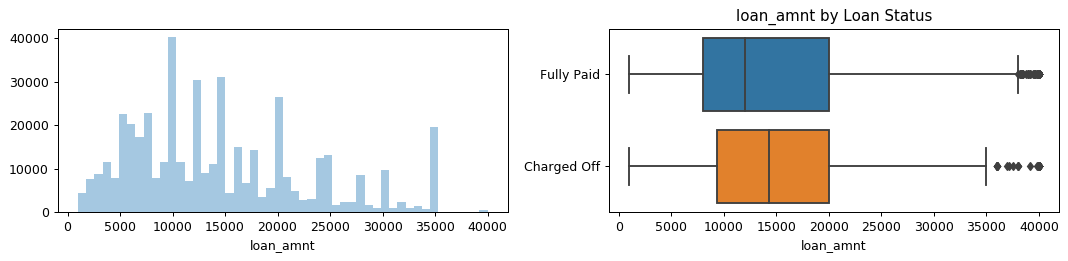

In [27]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)

sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
ax2.set_ylabel('')
ax2.set_title(col_name + ' by Loan Status')
plt.tight_layout()

We gonna put these line in one function plot_feature()

In [28]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)
# Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

The above function accepts two parameters;  
the first one is the feature name and the second one is the boolean variable: whether the feature is continuous or categorical.  
If the feature is continuous then function plot two subplots:
- (1) the distribution of the feature and 
- (2) the two boxplots based on loan_status class.  
On the other hand, if the feature is categorical, then the first subplot is count plot and the second subplot is based on the group_by loan_status classes.


In [29]:
df.iloc[0:5, 0: 10] # We gonna plot start from  term, since funded_amnt and funded_amnt_inv are the dame as loan_amnt

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
16,104190249,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector
38,104190255,35000.0,35000.0,35000.0,60 months,25.49%,1037.38,E,E4,Human Resource Specialist LER
40,104170260,17000.0,17000.0,17000.0,36 months,7.49%,528.73,A,A4,Air Traffic Controller
51,104046830,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,General manager
56,104220223,5000.0,5000.0,5000.0,36 months,14.99%,173.31,C,C4,Lead Supervisor


In [30]:
df.int_rate = df.int_rate.str.replace('%', '').astype(np.float32)
len(df.int_rate.value_counts())

200

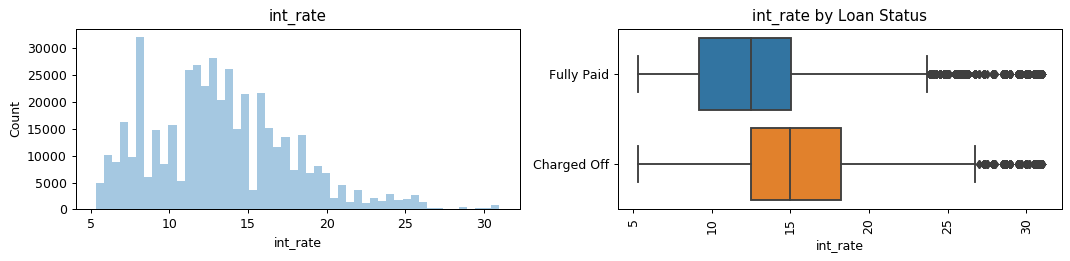

In [31]:
plot_feature('int_rate', True)

It looks like applicants who could not afford to pay back and eventually were charged off had to pay a higher interest rate.

### Features: grade and subgrade

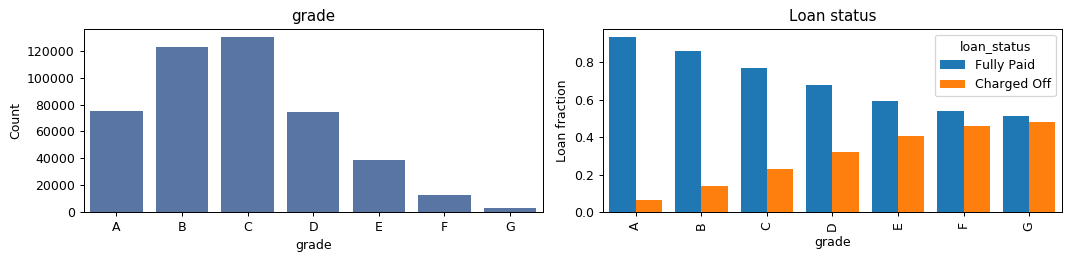

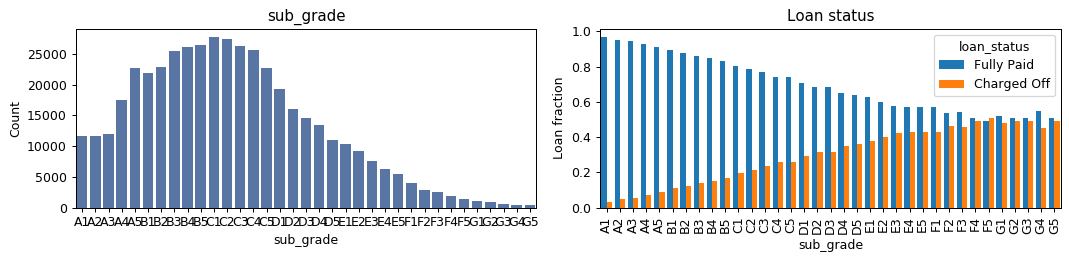

In [32]:
## Subgrade has 35 unique categories
plot_feature('grade', False)
plot_feature('sub_grade', False)

It seems that grade and sub_grade have same shape and relation with loan status. In this case, I would keep sub_grade, because it carries more information than the grade.

### Feature: Employment title

In [33]:
len(df.emp_title.value_counts())
128310

128310

It looks like emp_title has lots of unique value, which may not strongly be associated with predicted loan_status. Therefore, Idelete the feature.

In [34]:
features_to_be_removed = ['id', 'emp_title']

In [35]:
df.iloc[0:5, 6: 20]

,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code
16,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,Other,467xx
38,1037.38,E,E4,Human Resource Specialist LER,10+ years,MORTGAGE,114000.0,Source Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,224xx
40,528.73,A,A4,Air Traffic Controller,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,840xx
51,329.72,B,B5,General manager,10+ years,OWN,145000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,087xx
56,173.31,C,C4,Lead Supervisor,10+ years,RENT,68000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,945xx


In [36]:
df.emp_length.value_counts()

10+ years    151369
2 years       41008
< 1 year      36781
3 years       36372
1 year        29681
4 years       26812
5 years       26720
8 years       22753
7 years       22333
6 years       20774
9 years       18240
Name: emp_length, dtype: int64

In [37]:
df.emp_length.fillna(value=0, inplace=True)

In [38]:
df.emp_length.replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [39]:
df.emp_length[0:5]

16    10
38    10
40    10
51    10
56    10
Name: emp_length, dtype: object

In [40]:
df.emp_length = df.emp_length.astype(int)

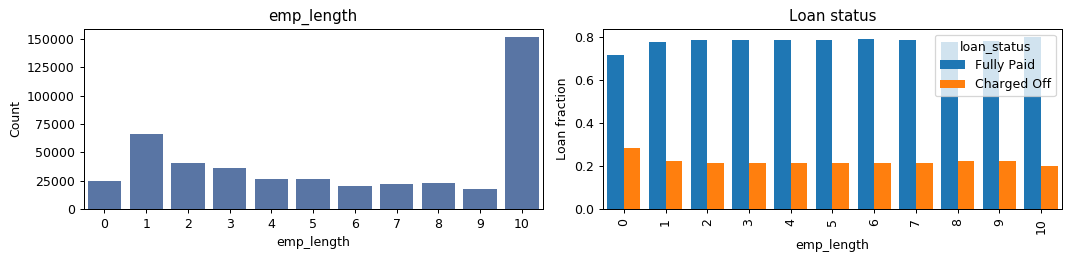

In [41]:
plot_feature('emp_length', False)

From the right plot, It looks like emp_lenght is not a strong predictor and has a little relationship with the loan status. Based on the model performance we may delete it.

In [42]:
df.home_ownership.value_counts()

MORTGAGE    228469
RENT        181308
OWN          47875
ANY             75
NONE             1
Name: home_ownership, dtype: int64

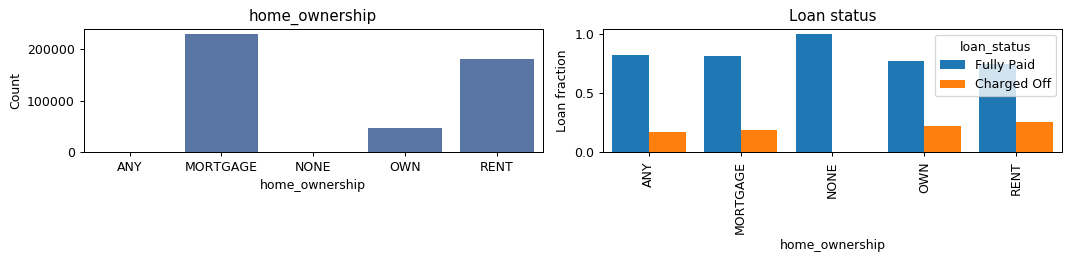

In [43]:
plot_feature('home_ownership', False)

In [44]:
df.verification_status.value_counts()

Source Verified    187996
Not Verified       135931
Verified           133801
Name: verification_status, dtype: int64

In [45]:
df.verification_status[0:5]

16       Not Verified
38    Source Verified
40       Not Verified
51       Not Verified
56       Not Verified
Name: verification_status, dtype: object

In [46]:
# df.verification_status.map(lambda x:1 if x== 'Not Verified' else 0)
df.verification_status = pd.get_dummies(df.verification_status)

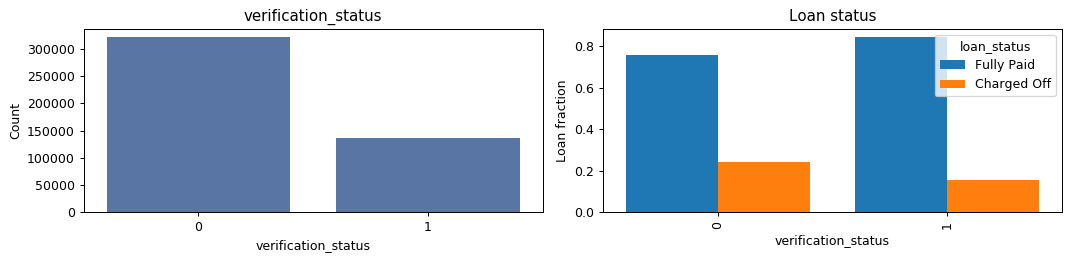

In [47]:
plot_feature('verification_status', False)

The verification_status feature is somewhat discriminating in the sense that, among the applicants whose source was verified are more likely to be charged off which is a little bit wired.

### Feature: Issue_d

In [48]:
df.issue_d.value_counts()

Oct-2014    33699
Jul-2014    25974
Jul-2015    23990
Jan-2015    22750
Oct-2015    22431
Nov-2014    21186
Apr-2015    20097
Dec-2015    19106
May-2015    17964
Aug-2015    17492
Apr-2014    17140
May-2014    17133
Aug-2014    16780
Nov-2015    16540
Jun-2015    15304
Jun-2014    15207
Mar-2015    14997
Mar-2014    14988
Feb-2015    14464
Jan-2014    14464
Feb-2014    13945
Sep-2015    13838
Sep-2014     9344
Dec-2014     8283
Jan-2017     5912
Mar-2017     5008
Feb-2017     4241
May-2017     3644
Apr-2017     3431
Jun-2017     2849
Jul-2017     2366
Aug-2017     1863
Sep-2017     1298
Name: issue_d, dtype: int64

The ‘issude_d’ feature is the string. Since we are dealing with three years of data and keep our model independent of year, we only extract month and then convert them into categories.

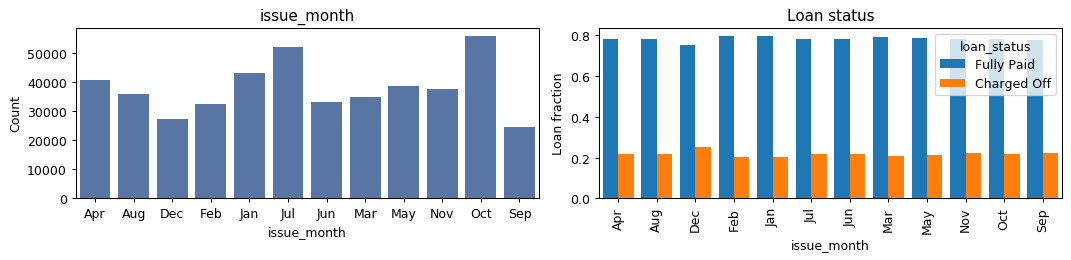

In [49]:
df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')
plot_feature('issue_month', False)

It looks like people who borrowed in December, are more likely to be charged off than those who borrowed in other months. Interesting.

In [52]:
df['issue_year'] = pd.Series(df.issue_d).str.replace(r'\w+-', '').astype(np.int)
df.issue_year.value_counts

<bound method IndexOpsMixin.value_counts of 16        2017
38        2017
40        2017
51        2017
56        2017
          ... 
421088    2015
421089    2015
421092    2015
421093    2015
421094    2015
Name: issue_year, Length: 457728, dtype: int32>

Since **URL** has nothing to do with loan_status, we gonna delete it.

In [55]:
df.drop('url', axis = 1, inplace = True)

# Feature: Purpose

In [56]:
df.purpose.value_counts()

debt_consolidation    276597
credit_card           102367
home_improvement       27628
other                  22100
major_purchase          8256
medical                 4786
small_business          4206
car                     3963
moving                  2954
vacation                2755
house                   1836
renewable_energy         268
wedding                   11
educational                1
Name: purpose, dtype: int64

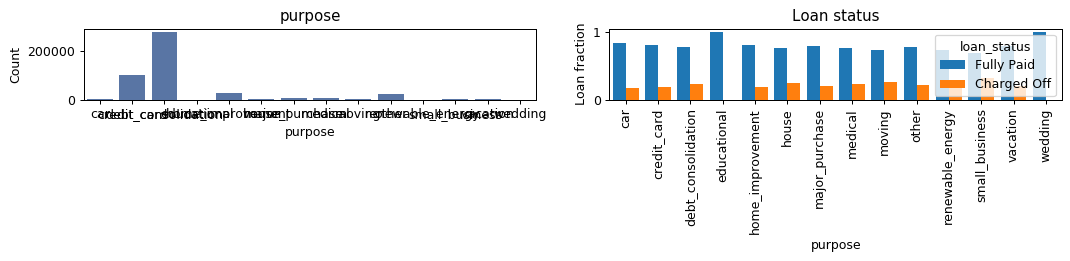

In [57]:
plot_feature('purpose', False)

It looks like, purpose can be a good discriminatory. For example, people who borrowed loans for renewable energy are more likely to be charged off than the applicants who borrowed a loan for cars or educational purpose.  
Since the title and zip code has many unique values, I simply remove them from the feature space.

# Feature: Address state

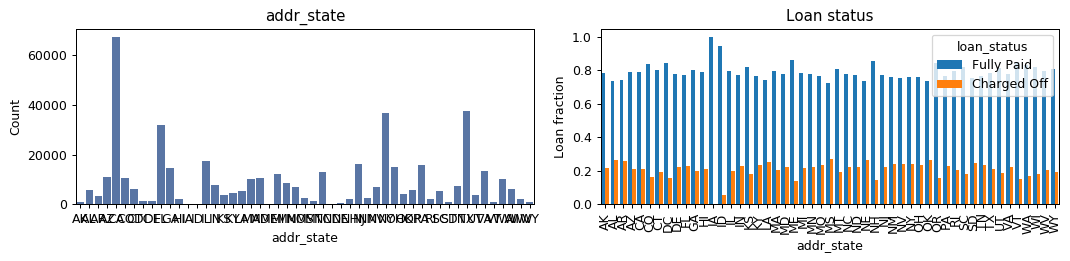

In [58]:
plot_feature('addr_state', False)

# 21–30 features

In [59]:
df['earliest_cr_year'] = df.earliest_cr_line.str.replace(r'\w+-', '').astype(np.int)
df['credit_history'] = np.absolute(df['issue_year']- df['earliest_cr_year'])

features_to_be_removed.extend(['issue_d', 'mths_since_last_delinq', 
                               'mths_since_last_record', 'inq_last_6mths', 
                               'mths_since_last_delinq', 'mths_since_last_record'])

# 31–40 features

In [60]:
df.iloc[0:5, 25: 40]

,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
16,1.0,NaN,96.0,18.0,1.0,5658.0,14.9%,33.0,w,3765.098751,3765.10,3600.0,165.10,0.0,0.0
38,1.0,30.0,NaN,17.0,0.0,35694.0,74.8%,31.0,w,36875.078917,36875.08,35000.0,1875.08,0.0,0.0
40,0.0,72.0,89.0,9.0,1.0,15406.0,31.6%,34.0,w,17282.802792,17282.80,17000.0,282.80,0.0,0.0
51,0.0,8.0,NaN,13.0,0.0,7936.0,31.9%,30.0,w,10365.368358,10365.37,10000.0,365.37,0.0,0.0
56,0.0,27.0,NaN,6.0,0.0,10276.0,90.1%,18.0,f,5168.906377,5168.91,5000.0,168.91,0.0,0.0


In [61]:
df.revol_util = df.revol_util.str.replace('%','').astype(np.float32)
df.initial_list_status.value_counts()


w    259204
f    198524
Name: initial_list_status, dtype: int64

In [62]:
df.initial_list_status = df.initial_list_status.map(lambda x: 1 if x== 'w' else 0)

features_to_be_removed.extend(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                               'total_rec_int', 'total_rec_late_fee'])

# 41–50 features

In [63]:
df.iloc[0:5, 35: 50]

,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq
16,3765.10,3600.0,165.10,0.0,0.0,0.0,Dec-2017,2984.31,Dec-2017,724.0,720.0,0.0,NaN,Individual,0.0
38,36875.08,35000.0,1875.08,0.0,0.0,0.0,Jun-2017,35565.10,Jun-2017,709.0,705.0,0.0,30.0,Individual,0.0
40,17282.80,17000.0,282.80,0.0,0.0,0.0,Jun-2017,16768.22,Dec-2017,764.0,760.0,0.0,75.0,Individual,0.0
51,10365.37,10000.0,365.37,0.0,0.0,0.0,Aug-2017,9388.98,Nov-2017,734.0,730.0,0.0,26.0,Individual,0.0
56,5168.91,5000.0,168.91,0.0,0.0,0.0,Jun-2017,5003.93,Dec-2017,659.0,655.0,0.0,NaN,Individual,0.0


In [64]:
df.application_type.value_counts()

Individual    456197
Joint App       1531
Name: application_type, dtype: int64

# 61 - 90 features

In [66]:
df.application_type = df.application_type.map(lambda x: 0 if x == 'Individual' else 1)

features_to_be_removed.extend(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
                               'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'])

In [67]:
features_to_be_removed.extend(['num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
                               'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
                               'num_rev_accts', 'num_rev_tl_bal_gt_0', 
                               'num_sats', 'num_tl_120dpd_2m'])

In [83]:

features_to_be_removed.extend([ 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt'])

In [68]:
features_to_be_removed.extend(['num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                               'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 
                               'total_bal_ex_mort', 'total_bc_limit'])

# 91 to rest of the features

In [69]:
df.iloc[0:5, 85:]

,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,issue_month,issue_year,earliest_cr_year,credit_history
16,0.0,93599.0,36506.0,9000.0,55699.0,Cash,N,Mar,2017,1992,25
38,0.0,424707.0,81780.0,32700.0,52309.0,Cash,N,Mar,2017,1998,19
40,0.0,374071.0,48682.0,47800.0,38667.0,Cash,N,Mar,2017,2005,12
51,0.0,411827.0,68390.0,18700.0,82927.0,Cash,N,Mar,2017,2005,12
56,0.0,52113.0,36168.0,11400.0,40713.0,Cash,N,Mar,2017,2003,14


In [70]:
df.disbursement_method.value_counts()

Cash         457716
DirectPay        12
Name: disbursement_method, dtype: int64

In [71]:
df.disbursement_method = df.disbursement_method.map(lambda x: 0 if x == 'Cash' else 1)
df.debt_settlement_flag.value_counts()

N    449510
Y      8218
Name: debt_settlement_flag, dtype: int64

In [86]:
df.debt_settlement_flag = df.debt_settlement_flag.map(lambda x: 0 if x == 'N' else 1)
features_to_be_removed.extend(['debt_settlement_flag', 'total_il_high_credit_limit'])

In [75]:
features_to_be_removed.extend(['emp_title', 'id'])

In [77]:
len(df.title.value_counts())

1935

In [78]:
features_to_be_removed.append('title')

In [79]:
features_to_be_removed.append('zip_code')

In [88]:
print(features_to_be_removed)

['id', 'emp_title', 'issue_d', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'debt_settlement_flag', 'total_il_high_credit_limit', 'emp_title', 'id', 'title', 'zip_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_1

In [94]:
features_to_be_removed = ['emp_title', 'id', 'title', 'zip_code', 'issue_d', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'debt_settlement_flag', 'total_il_high_credit_limit']

In [95]:
len(set(features_to_be_removed))

60

# Drop selected features

In [96]:
df_selected = df.drop(list(set(features_to_be_removed)), axis = 1)

In [97]:
df_selected.shape

(457728, 36)

In the above code, we see that there are 36 final features ready for creating a loan prediction model. Let also examine if there are any missing values in any of the selected 36 features.


In [109]:
# df_selected.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()
# df_selected.dtypes.to_frame('feature_type').reset_index()
df_dtypes = pd.merge(df_selected.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_selected.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')
# df_dtypes

In [110]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
29,verification_status,0,uint8
14,issue_year,0,int32
16,earliest_cr_year,0,int32
18,emp_length,0,int32
26,credit_history,0,int32
6,initial_list_status,0,int64
8,application_type,0,int64
12,disbursement_method,0,int64
22,int_rate,0,float32
0,loan_amnt,0,float64


If you run the above code, you see that ‘dti’ and ‘revol_util’ have 21 and 223 missing values. I use panda’s dropna() method to remove those examples associated with missing values.

In [111]:
df_selected.dropna(inplace=True)

In [112]:
df_selected.shape

(457484, 36)

In [118]:
df_selected.drop('earliest_cr_line', axis = True, inplace=True)

# Feature encode  
It’s time to encode some of the categorical features. In the following code, I encoded ‘purpose’, ‘home_ownership’, ‘grade’, ‘sub_grade’, ‘addr_state’:

In [117]:
df_selected.purpose = df_selected.purpose.astype("category", CategoricalDtype(np.unique(df_selected.purpose))).cat.codes
df_selected.purpose.value_counts()

2     276479
1     102340
4      27591
9      22073
6       8246
7       4776
11      4204
0       3959
8       2950
12      2751
5       1835
10       268
13        11
3          1
Name: purpose, dtype: int64

In [120]:
df_selected.home_ownership = df_selected.home_ownership.astype("category", CategoricalDtype(np.unique(df_selected.home_ownership))).cat.codes

In [121]:
df_selected.home_ownership.value_counts()

1    228337
4    181232
3     47839
0        75
2         1
Name: home_ownership, dtype: int64

In [124]:
df_selected.grade = df_selected.grade.astype("category", CategoricalDtype(np.unique(df_selected.grade))).cat.codes


In [126]:
df_selected.grade.value_counts()

2    129897
1    123032
0     75537
3     74262
4     38812
5     12501
6      3443
Name: grade, dtype: int64

In [127]:
df_selected.sub_grade = df_selected.sub_grade.astype("category", CategoricalDtype(np.unique(df_selected.sub_grade))).cat.codes

In [128]:
df_selected.sub_grade.value_counts()

10    27774
11    27365
9     26514
12    26361
8     26205
13    25596
7     25556
6     22881
14    22801
4     22731
5     21876
15    19234
3     17541
16    16039
17    14551
18    13390
2     11969
1     11707
0     11589
19    11048
20    10361
21     9170
22     7532
23     6255
24     5494
25     3989
26     2802
27     2447
28     1882
29     1381
30     1121
31      863
32      603
33      461
34      395
Name: sub_grade, dtype: int64

In [130]:
df_selected.addr_state = df_selected.addr_state.astype("category", CategoricalDtype(np.unique(df_selected.addr_state))).cat.codes


In [131]:
df_selected.sub_grade.value_counts()

10    27774
11    27365
9     26514
12    26361
8     26205
13    25596
7     25556
6     22881
14    22801
4     22731
5     21876
15    19234
3     17541
16    16039
17    14551
18    13390
2     11969
1     11707
0     11589
19    11048
20    10361
21     9170
22     7532
23     6255
24     5494
25     3989
26     2802
27     2447
28     1882
29     1381
30     1121
31      863
32      603
33      461
34      395
Name: sub_grade, dtype: int64

# Save seltected features

In [133]:
df_selected.columns
df_selected.to_csv('./data/LoanEligibilityPrediction/df_selected.csv', index = False)

# EDA on the selected 36 features.  
These analysis includes visualizing the correlation coefficient of the features, remove highly colinear features.
Let’s begin with importing libraries and reading dataset with selected features:

In [134]:
from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [136]:
df_selected = pd.read_csv('./data/LoanEligibilityPrediction/df_selected.csv')

# Feature correlation  
In machine learning, the importance of the feature correlation is significant. It helps us to identify bad and highly colinear features. The correlation matrix can also be used for feature engineering. In the plot below, the relationships among the features are shown:



In [137]:
corr = df_selected.corr()

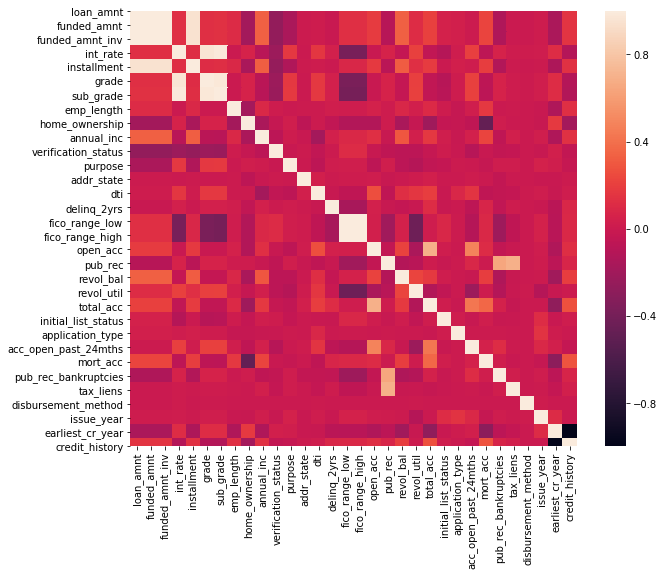

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()